In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
# Loading the dataset
df = pd.read_csv('spam.csv',encoding='latin-1')

# Exploratory Data Analysis (EDA)¶
- Exploring NaN values in dataset
- Plotting countplots for Spam vs. Ham

In [3]:
df.shape

(5572, 5)

In [4]:
df.columns

Index(['Label', 'Message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.dtypes

Label         object
Message       object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [6]:
df.head(10)

,Label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [7]:
df.tail()

,Label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
Label         5572 non-null object
Message       5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 108.9+ KB


In [9]:
df.describe(include='object')

,Label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""",GE,"GNT:-)"""
freq,4825,30,3,2,2


we have the majority of the ham category(4825) and we have less spam category  Sorry, I'll call later(30)

In [10]:
df['Label'].value_counts()
#will show count of the unique category

ham     4825
spam     747
Name: Label, dtype: int64

In [11]:
# Mapping values for label
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

In [12]:
df.head()

,Label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

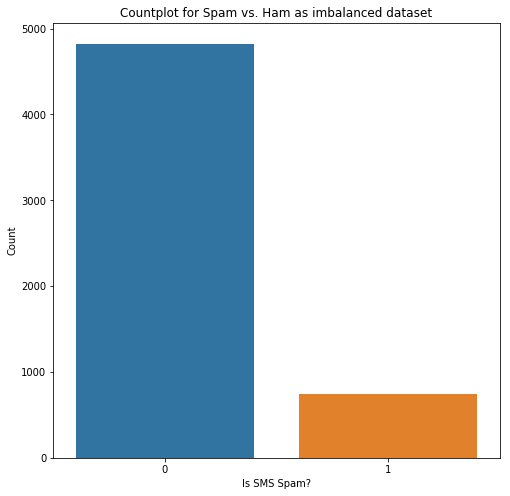

In [14]:
# Countplot for Spam vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='Label', data=df)
p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

# Feature Engineering
Handling imbalanced dataset using Oversampling

Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc.

In [15]:
# Handling imbalanced dataset using Oversampling
only_spam = df[df['Label']==1] #only spam message storing into the variable only_spam 
print(only_spam)

      Label                                            Message    Unnamed: 2  \
2         1  Free entry in 2 a wkly comp to win FA Cup fina...           NaN   
5         1  FreeMsg Hey there darling it's been 3 week's n...           NaN   
8         1  WINNER!! As a valued network customer you have...           NaN   
9         1  Had your mobile 11 months or more? U R entitle...           NaN   
11        1  SIX chances to win CASH! From 100 to 20,000 po...           NaN   
12        1  URGENT! You have won a 1 week FREE membership ...           NaN   
15        1  XXXMobileMovieClub: To use your credit, click ...           NaN   
19        1  England v Macedonia - dont miss the goals/team...           NaN   
34        1  Thanks for your subscription to Ringtone UK yo...           NaN   
42        1  07732584351 - Rodger Burns - MSG = We tried to...           NaN   
54        1  SMS. ac Sptv: The New Jersey Devils and the De...           NaN   
56        1  Congrats! 1 year special ci

In [16]:
only_spam.shape #747 spam message and 5 columns

(747, 5)

In [17]:
only_spam.shape[0] #taking only 747 spam message

747

In [18]:
df.shape #5572 rows and 5 columns

(5572, 5)

In [19]:
df.shape[0] #taking only 5572 rows

5572

In [20]:
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4825


In [21]:
count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
  df = pd.concat([df, only_spam])

df.shape


(9307, 5)

In [22]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis=1, inplace = True)

In [23]:
df.shape

(9307, 2)

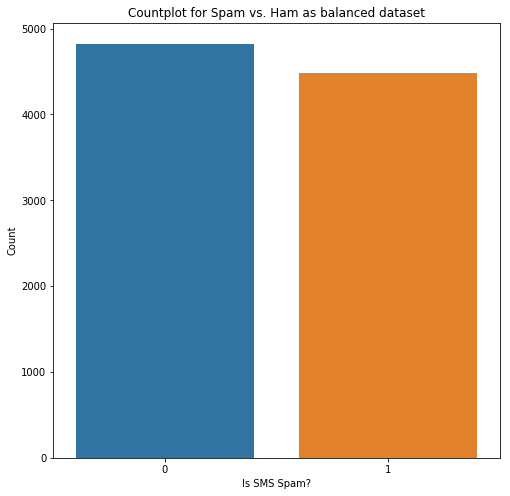

In [24]:
# Countplot for Spam vs. Ham as balanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='Label', data=df)
p = plt.title('Countplot for Spam vs. Ham as balanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

In [25]:
# Creating new feature word_count
df['word_count'] = df['Message'].apply(lambda x: len(x.split()))
#split() method in Python split a string into a list of strings after breaking the given string by the specified separator.

## demo
#creating new feature word_count
#on message column we are applying lamba function
#in lambda function for message we are applying split meathod and then calculating length of the message

In [26]:
df.head()

,Label,Message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13


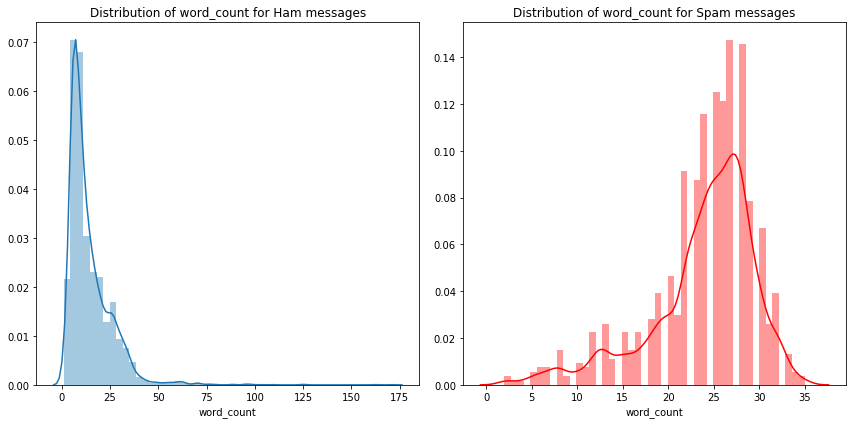

In [27]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=df[df['Label']==0].word_count) 
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=df[df['Label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

#The tight_layout() function in pyplot module of matplotlib library is used to automatically adjust subplot parameters to give specified padding.

we can see in above graph in ham we have less number of lenghthy message and in spam we can see that we have more number of lenghty message  

In [28]:
# Creating feature contains_currency_symbol
def currency(x):
  currency_symbols = ['€', '$', '¥', '£', '₹']
  for i in currency_symbols:
    if i in x:
      return 1
  return 0

df['contains_currency_symbol'] = df['Message'].apply(currency)

In [29]:
df.tail()

,Label,Message,word_count,contains_currency_symbol
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,1,This is the 2nd time we have tried 2 contact u...,30,1


if message have currency_symbol it will return 1 and if not then it will return 0

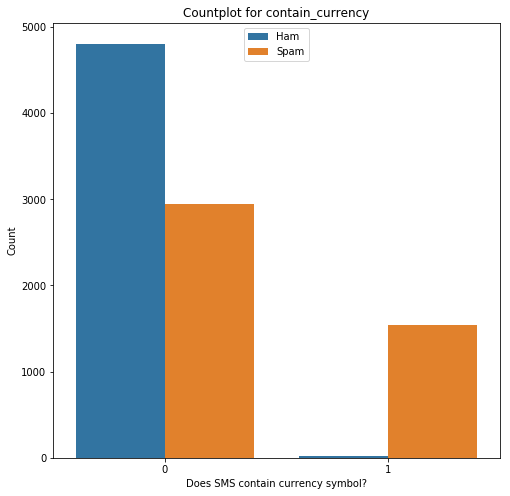

In [30]:
# Countplot for contains_currency_symbol
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbol', data=df, hue='Label')
p = plt.title('Countplot for contain_currency')
p = plt.xlabel('Does SMS contain currency symbol?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

Insight: Almost 1/3 of Spam messages contain currency symbols, and currency symbols are rarely used in Ham messages.

In [31]:
# Creating feature contains_number
def numbers(x):
  for i in x:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

df['contains_number'] = df['Message'].apply(numbers)


In [32]:
df.head()

,Label,Message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0


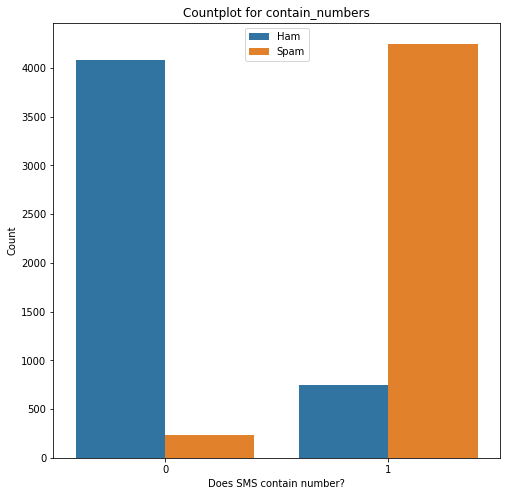

In [33]:
# Countplot for contains_number
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=df, hue='Label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'], loc=9)

Insight: It is evident that most of the Spam messages contain numbers, and majority of the Ham messages donot contain numbers.

# Data Cleaning
- Removing special character and numbers using regular expression
- Converting the entire sms into lower case
- Tokenizing the sms by words
- Removing the stop words
- Lemmatizing the words
- Joining the lemmatized words
- Building a corpus of messages

In [35]:
# Importing essential libraries for performing NLP
import nltk #(natural language toolkit)
import re #REGULAR expression support modifier, identifier and white space
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [36]:
# Cleaning the messages
corpus = []
wnl = WordNetLemmatizer()

for sms_string in list(df.Message):

  # Cleaning special character from the sms
  Message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms_string)

  # Converting the entire sms into lower case
  Message = Message.lower()

  # Tokenizing the sms by words
  words = Message.split()

  # Removing the stop words
  filtered_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Lemmatizing the words
  lemmatized_words = [wnl.lemmatize(word) for word in filtered_words]

  # Joining the lemmatized words
  Message = ' '.join(lemmatized_words)

  # Building a corpus of messages
  corpus.append(Message)

In [37]:
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [38]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()

# max_features=500 : selecting top 500 columns which is occuring frequently
#basically selecting the columns of words which are frequently occuring 

In [39]:
vectors.shape 
#in column we have differents words
#in row we have total number of rows

(9307, 500)

In [40]:
feature_names = tfidf.get_feature_names()

In [41]:
# Extracting independent and dependent variables from the dataset
X = pd.DataFrame(vectors, columns=feature_names)
y = df['Label']


# Model Building & Evaluation¶

- Decision Tree: 0.97
- Random Forest (Ensemble): 0.99


In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Fitting decision tree to the Training set
from sklearn.tree import DecisionTreeClassifier
spam_detect_model = DecisionTreeClassifier().fit(X_train, y_train)

In [45]:
y_pred = spam_detect_model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test, y_pred)

0.9795918367346939

In [48]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
spam_detect_model = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

In [49]:
y_pred = spam_detect_model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9951664876476907

Random Forest algorithm is selected for predicting the results of this problem statement.

# Making Predictions

In [51]:
def predict_spam(sample_message):
  sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
  sample_message = sample_message.lower()
  sample_message_words = sample_message.split()
  sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
  final_message = [wnl.lemmatize(word) for word in sample_message_words]
  final_message = ' '.join(final_message)

  temp = tfidf.transform([final_message]).toarray()
  return spam_detect_model.predict(temp)

In [52]:
# Prediction 1 - Lottery text message
sample_message = 'IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')


Gotcha! This is a SPAM message.


In [54]:
# Prediction 3 - Casual text chat
sample_message = 'hey! are you there?'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')


This is a HAM (normal) message.


In [55]:
# Predicting values 4 - Feedback message
sample_message = 'Tammy, thanks for choosing Carl’s Car Wash for your express polish. We would love to hear your thoughts on the service. Feel free to text back with any feedback. Safe driving!'

if predict_spam(sample_message):
  print('Gotcha! This is a SPAM message.')
else:
  print('This is a HAM (normal) message.')


Gotcha! This is a SPAM message.
